In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-inviter-conv)

We set up a $5\times 5$ triangular matrix with prescribed eigenvalues on its diagonal.

In [2]:
ev = array([1, -0.75, 0.6, -0.4, 0])
A = triu(ones([5, 5]), 1) + diag(ev)    # triangular matrix, eigs on diagonal

We run inverse iteration with the shift $s=0.7$. Convergence should be to the eigenvalue closest to the shift, which we know to be $0.6$ here.

In [3]:
beta, x = FNC.inviter(A, 0.7, 30)
print(beta)

[0.7378409  0.54071925 0.61997941 0.59374506 0.60216734 0.59929167
 0.60023835 0.59992089 0.60002642 0.5999912  0.60000293 0.59999902
 0.60000033 0.59999989 0.60000004 0.59999999 0.6        0.6
 0.6        0.6        0.6        0.6        0.6        0.6
 0.6        0.6        0.6        0.6        0.6        0.6       ]


As expected, the eigenvalue that was found is the one closest to 0.7. The convergence is again linear.

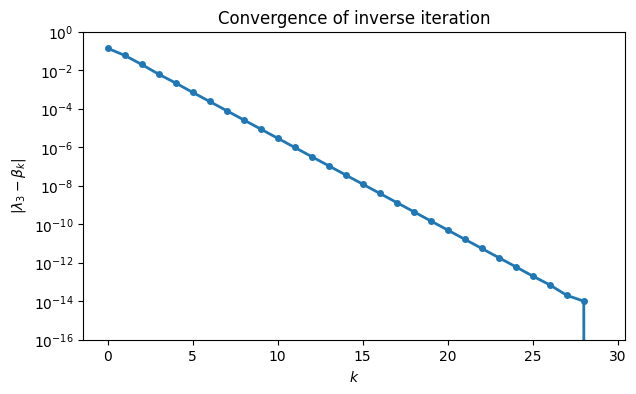

In [4]:
err = beta[-1] - beta    # last estimate is our best
semilogy(arange(30), abs(err), "-o")
ylim(1e-16, 1)
xlabel("$k$"),  ylabel("$|\\lambda_3 - \\beta_k|$")
title(("Convergence of inverse iteration"));

```{index} ! Python; argsort
```

Let's reorder the eigenvalues to enforce {eq}`shiftorder`.
```{tip}
:class: dropdown
The `argsort` function returns the index permutation needed to sort the given vector, rather than the sorted vector itself.
```

In [5]:
ev = ev[argsort(abs(ev - 0.7))]
print(ev)

[ 0.6   1.    0.   -0.4  -0.75]


Now it is easy to compare the theoretical and observed linear convergence rates.

In [6]:
print(f"theory: {(ev[0] - 0.7) / (ev[1] - 0.7):.5f}")
print(f"observed: {err[21] / err[20]:.5f}")

theory: -0.33333
observed: -0.33326
